3. Tackle the Titanic dataset. A great place to start is on Kaggle. Alternatively,
you can download the data from https://homl.info/titanic.tgz and unzip this
tarball like you did for the housing data in Chapter 2. This will give you two
CSV files, train.csv and test.csv, which you can load using
pandas.read_csv() . The goal is to train a classifier that can predict the
Survived column based on the other columns.

In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('titanic/titanic/train.csv')

In [3]:
test = pd.read_csv('titanic/titanic/test.csv')

In [4]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen 'Carrie'",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
train.isnull().sum() / len(train)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [6]:
train.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096066
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096066,0.159651,0.216225,1.000000


In [7]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
train.select_dtypes(object) # i dont think these feature are quite helpfull in predicting Survied or not, but lets try...

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,NaN,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen 'Carrie'",female,W./C. 6607,NaN,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


In [44]:
X = train.drop(['Survived', 'Name', 'PassengerId', 'Cabin', 'Ticket'], axis=1) # lets drop cabin for now
y = train['Survived']

In [45]:
X.select_dtypes('object')

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S
...,...,...
886,male,S
887,female,S
888,female,S
889,male,C


In [46]:
import numpy as np

In [47]:
X.select_dtypes(np.number).columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [48]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,NaN,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [49]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
]
)

cat_pipeline_oh = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('oh_encoder', OneHotEncoder(handle_unknown='ignore'))
]
)

cat_pipeline_ord = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ord_encoder', OrdinalEncoder())
]
)

column_trans = ColumnTransformer([
    ('numeric_cols', num_pipeline, make_column_selector(dtype_include=np.number)),
    ('cat_columns_oh', cat_pipeline_oh, ['Embarked']),
    ('cat_columns_ord', cat_pipeline_ord, ['Sex']),
])



In [50]:
column_trans.fit_transform(X)

array([[ 3., 22.,  1., ...,  0.,  1.,  1.],
       [ 1., 38.,  1., ...,  0.,  0.,  0.],
       [ 3., 26.,  0., ...,  0.,  1.,  0.],
       ...,
       [ 3., 28.,  1., ...,  0.,  1.,  0.],
       [ 1., 26.,  0., ...,  0.,  0.,  1.],
       [ 3., 32.,  0., ...,  1.,  0.,  1.]])

In [51]:
column_trans.get_feature_names_out()

array(['numeric_cols__Pclass', 'numeric_cols__Age', 'numeric_cols__SibSp',
       'numeric_cols__Parch', 'numeric_cols__Fare',
       'cat_columns_oh__Embarked_C', 'cat_columns_oh__Embarked_Q',
       'cat_columns_oh__Embarked_S', 'cat_columns_ord__Sex'], dtype=object)

In [52]:
X = pd.DataFrame(data=column_trans.fit_transform(X), columns=column_trans.get_feature_names_out())

In [53]:
X

,numeric_cols__Pclass,numeric_cols__Age,numeric_cols__SibSp,numeric_cols__Parch,numeric_cols__Fare,cat_columns_oh__Embarked_C,cat_columns_oh__Embarked_Q,cat_columns_oh__Embarked_S,cat_columns_ord__Sex
0,3.0,22.0,1.0,0.0,7.2500,0.0,0.0,1.0,1.0
1,1.0,38.0,1.0,0.0,71.2833,1.0,0.0,0.0,0.0
2,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,1.0,0.0
3,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,1.0,0.0
4,3.0,35.0,0.0,0.0,8.0500,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
886,2.0,27.0,0.0,0.0,13.0000,0.0,0.0,1.0,1.0
887,1.0,19.0,0.0,0.0,30.0000,0.0,0.0,1.0,0.0
888,3.0,28.0,1.0,2.0,23.4500,0.0,0.0,1.0,0.0
889,1.0,26.0,0.0,0.0,30.0000,1.0,0.0,0.0,1.0


In [54]:
X.isnull().sum()/len(X)

numeric_cols__Pclass          0.0
numeric_cols__Age             0.0
numeric_cols__SibSp           0.0
numeric_cols__Parch           0.0
numeric_cols__Fare            0.0
cat_columns_oh__Embarked_C    0.0
cat_columns_oh__Embarked_Q    0.0
cat_columns_oh__Embarked_S    0.0
cat_columns_ord__Sex          0.0
dtype: float64

In [56]:
pd.concat([X, y], axis=1).corr()

,numeric_cols__Pclass,numeric_cols__Age,numeric_cols__SibSp,numeric_cols__Parch,numeric_cols__Fare,cat_columns_oh__Embarked_C,cat_columns_oh__Embarked_Q,cat_columns_oh__Embarked_S,cat_columns_ord__Sex,Survived
numeric_cols__Pclass,1.000000,-0.339898,0.083081,0.018443,-0.549500,-0.243292,0.221009,0.074053,0.131900,-0.338481
numeric_cols__Age,-0.339898,1.000000,-0.233296,-0.172482,0.096688,0.030247,-0.031415,-0.006728,0.081162,-0.064911
numeric_cols__SibSp,0.083081,-0.233296,1.000000,0.414838,0.159651,-0.059528,-0.026354,0.068734,-0.114631,-0.035322
numeric_cols__Parch,0.018443,-0.172482,0.414838,1.000000,0.216225,-0.011069,-0.081228,0.060814,-0.245489,0.081629
numeric_cols__Fare,-0.549500,0.096688,0.159651,0.216225,1.000000,0.269335,-0.117216,-0.162184,-0.182333,0.257307
cat_columns_oh__Embarked_C,-0.243292,0.030247,-0.059528,-0.011069,0.269335,1.000000,-0.148258,-0.782742,-0.082853,0.168240
cat_columns_oh__Embarked_Q,0.221009,-0.031415,-0.026354,-0.081228,-0.117216,-0.148258,1.000000,-0.499421,-0.074115,0.003650
cat_columns_oh__Embarked_S,0.074053,-0.006728,0.068734,0.060814,-0.162184,-0.782742,-0.499421,1.000000,0.119224,-0.149683
cat_columns_ord__Sex,0.131900,0.081162,-0.114631,-0.245489,-0.182333,-0.082853,-0.074115,0.119224,1.000000,-0.543351
Survived,-0.338481,-0.064911,-0.035322,0.081629,0.257307,0.168240,0.003650,-0.149683,-0.543351,1.000000


In [59]:
X['numeric_cols__Pclass'].value_counts() # Reservation Class, 1st class, 2nd class, 3rd class

numeric_cols__Pclass
3.0    491
1.0    216
2.0    184
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

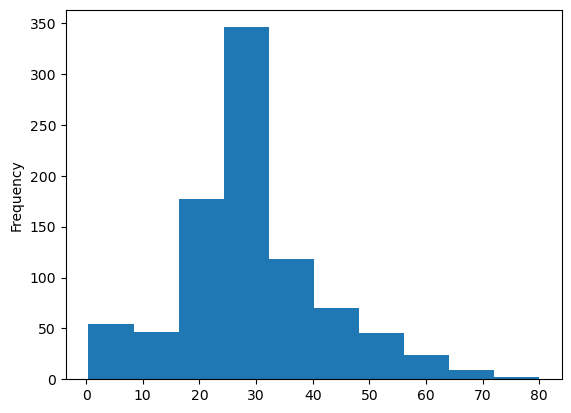

In [60]:
X['numeric_cols__Age'].plot.hist()

In [61]:
X['numeric_cols__Age'].describe()

count    891.000000
mean      29.361579
std       13.019705
min        0.416700
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: numeric_cols__Age, dtype: float64

array([[<Axes: title={'center': 'numeric_cols__Pclass'}>,
        <Axes: title={'center': 'numeric_cols__Age'}>,
        <Axes: title={'center': 'numeric_cols__SibSp'}>],
       [<Axes: title={'center': 'numeric_cols__Parch'}>,
        <Axes: title={'center': 'numeric_cols__Fare'}>,
        <Axes: title={'center': 'cat_columns_oh__Embarked_C'}>],
       [<Axes: title={'center': 'cat_columns_oh__Embarked_Q'}>,
        <Axes: title={'center': 'cat_columns_oh__Embarked_S'}>,
        <Axes: title={'center': 'cat_columns_ord__Sex'}>]], dtype=object)

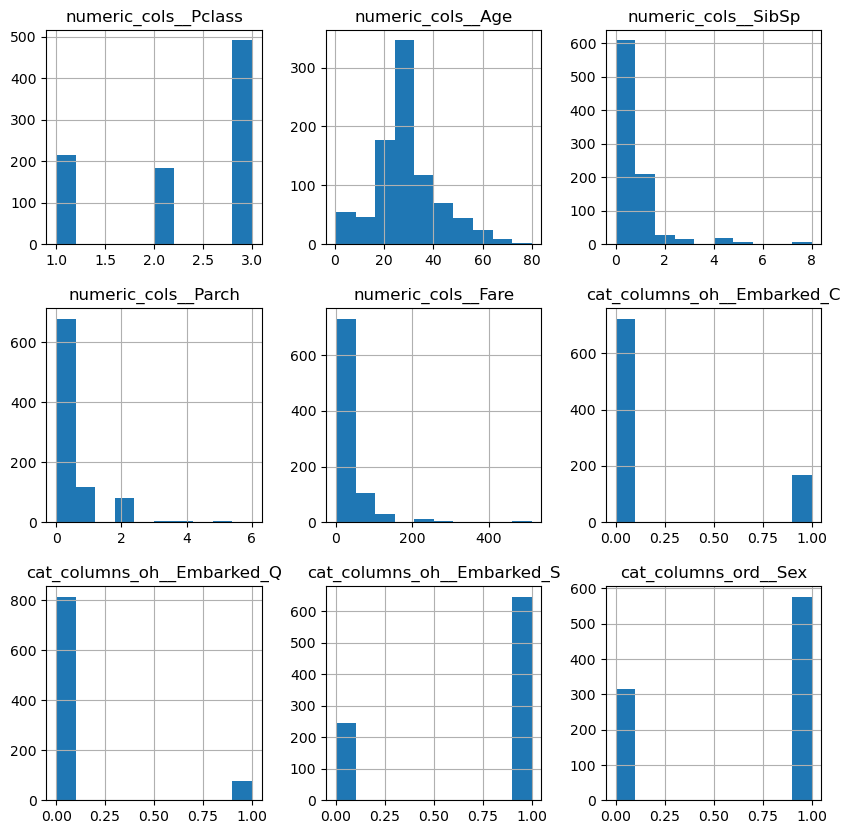

In [62]:
X.hist(figsize=(10, 10))

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [68]:
X_train.shape, X_test.shape

((623, 9), (268, 9))

In [74]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict, GridSearchCV

In [70]:
kn_clg = KNeighborsClassifier()

y_pred = cross_val_predict(kn_clg, X_train, y_train)

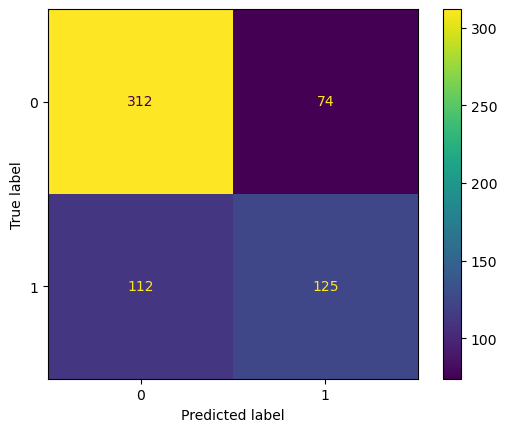

In [71]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_train, y_pred)

In [ ]:
param_grid = {
    'n_neighbors': [1, 3, 5, 7],
    'weights': ['uniform', 'distance']
}
grid_cv = GridSearchCV(kn_clg, param_grid=param_grid, cv=3)

In [76]:
grid_cv.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7],
                         'weights': ['uniform', 'distance']})

In [78]:
grid_cv.best_estimator_, grid_cv.best_score_

(KNeighborsClassifier(n_neighbors=3, weights='distance'), 0.7368516129032259)

In [79]:
grid_cv.best_estimator_.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [82]:
y_pred_train = grid_cv.predict(X_train)

In [83]:
accuracy_score(y_train, y_pred_train)

0.9887640449438202

In [89]:
y_pred = grid_cv.predict(X_test)

In [90]:
accuracy_score(y_test, y_pred)

0.6604477611940298

In [92]:
# lets add deck feature from cabin

train['DECK'] = train[train['Cabin'].notna()]['Cabin'].str[0]

In [95]:
train['DECK'].value_counts(), train['DECK'].isnull().sum()

(DECK
 C    59
 B    47
 D    33
 E    32
 A    15
 F    13
 G     4
 T     1
 Name: count, dtype: int64,
 687)

In [114]:
train[train['Cabin'].isnull()]['Pclass'].value_counts() # most of the missing values are comming from 3rd class

Pclass
3    479
2    168
1     40
Name: count, dtype: int64

In [115]:
train[train['Cabin'].notnull() & train['Pclass']==1]['DECK'].value_counts()

DECK
C    59
B    47
D    29
E    28
A    15
F     5
G     4
T     1
Name: count, dtype: int64

In [116]:
train.loc[train['DECK'].isna(), 'DECK'] = 'C'

In [119]:
train[['Pclass', 'Cabin']].value_counts().reset_index()

,Pclass,Cabin,count
0,3,G6,4
1,1,B96 B98,4
2,1,C23 C25 C27,4
3,2,D,3
4,2,E101,3
...,...,...,...
142,1,C101,1
143,1,B94,1
144,1,B86,1
145,1,B82 B84,1


In [122]:
train = train.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

In [125]:
train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [131]:
train[['Sex', 'Survived']].groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [133]:
train[['Embarked', 'Survived']].groupby(['Embarked', 'Survived'])['Survived'].count()

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

In [153]:
train.loc[train['Embarked'], 'Embarked'] = train['Embarked'].mode()

2

In [139]:
from sklearn.preprocessing import OrdinalEncoder

ord_encoder = OrdinalEncoder()
train['Sex_encoder'] = ord_encoder.fit_transform(train[['Sex']])

In [148]:
from sklearn.preprocessing import OneHotEncoder

oh_encoder = OneHotEncoder()
oh_embarked = oh_encoder.fit_transform(X = train[['Embarked']])

In [149]:
oh_embarked.toarray()

array([[0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]])